### 1. matplotlib을 import 하고 폰트가 깨져서 다른 폰트를 import 했습니다.

In [1]:
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

Gulim


### 1. 필요한 라이브러리 import 했습니다
### 2. 혈액데이터의 칼럼을 height와 weight로 이름을 바꾸고(편의성을 위해) bmi라는 새로운 칼럼을 만들었습니다
### 3. 그리고 허리둘레와 bmi를 나눠서 special bmi라는 칼럼도 생성했습니다. 왜냐하면 근육질인 사람은 bmi가 높아도 허리둘레는 상대적으로 낮기 때문입니다. 그래서 bmi만으로는 건강하다는것을 파악하기 힘들다고 생각했습니다.
### 4. 그리고 필요없는 칼럼들은 삭제를 해주고 null값이 있는 행을 삭제합니다.
### 5. 중요한 데이터인 hdl과 ldl에 이상치가 있어 제거를 해줬습니다.

In [2]:
import pandas as pd
import numpy as np

blood_data=pd.read_csv('blood.csv',engine='python',encoding='CP949')

blood_data.rename(columns = {'신장(5Cm단위)' : 'height'}, inplace = True)
blood_data.rename(columns = {'체중(5Kg단위)' : 'weight'}, inplace = True)

blood_data['bmi']=blood_data['weight']/(blood_data['height']**2/10000)
blood_data['special_bmi']=blood_data['허리둘레']/blood_data['bmi']
blood_data=blood_data.drop(blood_data.columns[[8,9,10,11]], axis='columns')
blood_data=blood_data.drop(blood_data.columns[[22,23,24,25,26,27,28,29]], axis='columns')
blood_data=blood_data.drop(blood_data.columns[[0,1,4]], axis='columns')
blood_data=blood_data.drop(blood_data.columns[[2,3]], axis='columns')
blood_data=blood_data.dropna(axis=0)
blood_data=blood_data[blood_data['LDL콜레스테롤']>75]
blood_data=blood_data[blood_data['HDL콜레스테롤']<130]
blood_data.head()

,성별코드,연령대코드(5세단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,bmi,special_bmi
0,1,10,86.0,140.0,90.0,91.0,263.0,196.0,46.0,177.0,16.0,1.0,0.9,27.0,30.0,45.0,3.0,24.489796,3.511667
1,2,11,85.0,138.0,80.0,105.0,185.0,262.0,35.0,122.0,13.1,1.0,0.9,18.0,17.0,19.0,1.0,25.390625,3.347692
2,2,11,80.0,138.0,88.0,93.0,246.0,186.0,59.0,150.0,13.6,1.0,0.7,23.0,19.0,64.0,1.0,24.444444,3.272727
3,1,12,85.0,124.0,76.0,93.0,179.0,79.0,40.0,123.0,16.8,1.0,1.0,20.0,39.0,69.0,2.0,22.857143,3.718750
4,2,6,67.0,121.0,68.0,96.0,223.0,104.0,72.0,130.0,12.8,1.0,0.7,13.0,7.0,20.0,1.0,19.531250,3.430400


### 1. 허리둘레 칼럼도 special bmi에 들어가 있으므로 제거합니다.

In [4]:
blood_data=blood_data[blood_data['허리둘레']<300]
blood_data=blood_data.drop(blood_data.columns[[2]], axis='columns') #허리둘레 제거

In [5]:
b_data=blood_data


b_data["LDL_cat"] = pd.cut(b_data["LDL콜레스테롤"],
                               bins=[0., 100., 130.,160., 190., np.inf],
                               labels=[1, 2, 3, 4, 5])

b_data["HDL_cat"] = pd.cut(b_data["HDL콜레스테롤"],
                               bins=[0.,40.,60., np.inf],
                               labels=[0,1,2])

b_data["TC_cat"] = pd.cut(b_data["총콜레스테롤"],
                               bins=[0.,200.,240., np.inf],
                               labels=[1,2,3])
b_data["고혈압_1"] = pd.cut(b_data["이완기혈압"],
                               bins=[0., 90.,np.inf],
                               labels=[0,1])
b_data["고혈압_2"] = pd.cut(b_data["수축기혈압"],
                               bins=[0., 140.,np.inf],
                               labels=[0,1])
b_data['고혈압']=b_data['고혈압_1'].astype('float')+b_data['고혈압_2'].astype('float')
b_data['고혈압']=np.ceil(b_data['고혈압']/2)


In [6]:
b_data=b_data.drop(['고혈압_1','고혈압_2'], axis='columns')
b_data.head()

,성별코드,연령대코드(5세단위),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,bmi,special_bmi,LDL_cat,HDL_cat,TC_cat,고혈압
0,1,10,140.0,90.0,91.0,263.0,196.0,46.0,177.0,16.0,...,27.0,30.0,45.0,3.0,24.489796,3.511667,4,1,3,0.0
1,2,11,138.0,80.0,105.0,185.0,262.0,35.0,122.0,13.1,...,18.0,17.0,19.0,1.0,25.390625,3.347692,2,0,1,0.0
2,2,11,138.0,88.0,93.0,246.0,186.0,59.0,150.0,13.6,...,23.0,19.0,64.0,1.0,24.444444,3.272727,3,1,3,0.0
3,1,12,124.0,76.0,93.0,179.0,79.0,40.0,123.0,16.8,...,20.0,39.0,69.0,2.0,22.857143,3.718750,2,0,1,0.0
4,2,6,121.0,68.0,96.0,223.0,104.0,72.0,130.0,12.8,...,13.0,7.0,20.0,1.0,19.531250,3.430400,2,2,2,0.0


In [80]:
b_data.head()

,성별코드,연령대코드(5세단위),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,bmi,special_bmi,LDL_cat,HDL_cat,TC_cat,고혈압
0,1,10,140.0,90.0,91.0,263.0,196.0,46.0,177.0,16.0,...,27.0,30.0,45.0,3.0,24.489796,3.511667,4,1,3,0.0
1,2,11,138.0,80.0,105.0,185.0,262.0,35.0,122.0,13.1,...,18.0,17.0,19.0,1.0,25.390625,3.347692,2,0,1,0.0
2,2,11,138.0,88.0,93.0,246.0,186.0,59.0,150.0,13.6,...,23.0,19.0,64.0,1.0,24.444444,3.272727,3,1,3,0.0
3,1,12,124.0,76.0,93.0,179.0,79.0,40.0,123.0,16.8,...,20.0,39.0,69.0,2.0,22.857143,3.718750,2,0,1,0.0
4,2,6,121.0,68.0,96.0,223.0,104.0,72.0,130.0,12.8,...,13.0,7.0,20.0,1.0,19.531250,3.430400,2,2,2,0.0


In [81]:
sum(b_data['LDL콜레스테롤']<65)

0

# LDL과 HDL의 건강과의 상관관계
주장1 : HDL은 건강에 좋고 LDL은 나쁘다. 그래서 총 콜레스테롤이 높아도 HDL이 높고 LDL이 정상이면 bmi나 허리둘레나 다른 결과들이 좋게 나타날 것이다. 

주장2 : 반대로 LDL이높고 HDL이 낮은경우는 건강이 매우 안좋다(bmi)는 신호일것이다.

주장3 : LDL수치와 HDL수치가 둘다 높거나 낮은경우도 건강이 좋지만은 않을것이다.

LDL수치와 HDL수치가 둘다 높은 경우 HDL수치가 높고 LDL수치는 정상이거나 낮은경우 HDL수치가 정상이고 LDL수치가 높은 경우 HDL수치와 LDL수치가 둘다 낮은 경우(총콜레스테롤이 낮은경우) LDL-콜레스테롤

< 100 정상 (optimal)

100 ~ 129 정상 이상 (near optimal/above optimal)

130 ~ 159 약간 높음 (borderline high)

160 ~ 189 높음 (high)

190 이상 아주 높음 (very high)

총콜레스테롤

< 200 적절 (desirable)

200 ~ 239 약간 높음 (borderline high)

240 이상 높음 (high)

HDL-콜레스테롤

< 40 낮음 (low)

60 이상 높음 (high)

## 주장1 : HDL은 건강에 좋고 LDL은 나쁘다. 그래서 총 콜레스테롤이 높아도 HDL이 높고 LDL이 정상이면 bmi나 허리둘레나 다른 결과들이 좋게 나타날 것이다.

In [96]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(b_data[:100000], test_size=0.2, random_state=42)

In [158]:
train_X=train_set[['HDL콜레스테롤','LDL콜레스테롤','트리글리세라이드','감마지티피','혈색소']]

In [159]:
train_y=train_set['수축기혈압']
train_y

86485     123.0
56221     119.0
51659     133.0
15627     125.0
106588    132.0
          ...  
7239      130.0
63066     120.0
88305     102.0
983       147.0
18192     130.0
Name: 수축기혈압, Length: 80000, dtype: float64

In [160]:
test_X=test_set[['HDL콜레스테롤','LDL콜레스테롤','트리글리세라이드','감마지티피','혈색소']]

In [161]:
test_y=test_set['수축기혈압']
test_y

87055     110.0
92164     130.0
22833     124.0
88164     130.0
106886    123.0
          ...  
37530     100.0
33743     110.0
43559     118.0
61381     139.0
48762     160.0
Name: 수축기혈압, Length: 20000, dtype: float64

In [67]:
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
train_scaled=stds.fit_transform(train_X)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'C': [1,5,10,20], }]

log_reg = LogisticRegression()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(log_reg, param_grid, cv=5,
                           scoring='roc_auc',
                           return_train_score=True)
grid_search.fit(train_scaled[:20000], train_y[:20000])

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 5, 10, 20]}], return_train_score=True,
             scoring='roc_auc')

In [17]:
grid_search.best_params_

{'C': 1}

In [18]:
grid_search.best_estimator_.fit(train_scaled, train_y)

LogisticRegression(C=1)

In [19]:
grid_search.cv_results_

{'mean_fit_time': array([0.00755219, 0.        , 0.00937538, 0.00443621]),
 'std_fit_time': array([0.00700789, 0.        , 0.00765497, 0.00615212]),
 'mean_score_time': array([0.        , 0.00312548, 0.        , 0.        ]),
 'std_score_time': array([0.        , 0.00625095, 0.        , 0.        ]),
 'param_C': masked_array(data=[1, 5, 10, 20],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1}, {'C': 5}, {'C': 10}, {'C': 20}],
 'split0_test_score': array([0.72300114, 0.72297341, 0.72297341, 0.72297341]),
 'split1_test_score': array([0.70906385, 0.70905461, 0.70904999, 0.70903151]),
 'split2_test_score': array([0.71101397, 0.71101397, 0.71101397, 0.71101397]),
 'split3_test_score': array([0.68209041, 0.68208117, 0.68207654, 0.68207192]),
 'split4_test_score': array([0.69856532, 0.6985422 , 0.6985422 , 0.6985422 ]),
 'mean_test_score': array([0.70474694, 0.70473307, 0.70473122, 0.7047266 ]),
 'std_test_score': array

In [20]:
model=grid_search.best_estimator_

In [21]:
from sklearn.metrics import accuracy_score
test_scaled=stds.transform(test_X)
b_predictions = model.predict(test_scaled)
accuracy_score(test_y, b_predictions)

0.8663943990665111

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [23]:
cm = confusion_matrix(test_y,b_predictions)
print(cm)

[[1483    7]
 [ 222    2]]


In [24]:
highH_normalL[highH_normalL['고혈압']==1]

,성별코드,연령대코드(5세단위),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,bmi,special_bmi,LDL_cat,HDL_cat,TC_cat,고혈압
777,1,13,153.0,85.0,101.0,229.0,306.0,67.0,100.0,15.2,...,30.0,22.0,43.0,2.0,24.221453,3.798286,1,2,2,1.0
914,2,14,131.0,103.0,89.0,217.0,89.0,105.0,94.0,14.8,...,53.0,74.0,32.0,1.0,21.403092,3.317278,1,2,2,1.0
951,1,9,144.0,97.0,98.0,236.0,300.0,79.0,97.0,14.1,...,37.0,43.0,55.0,3.0,21.484375,3.723636,1,2,2,1.0
1182,1,11,150.0,90.0,101.0,211.0,253.0,80.0,80.0,14.4,...,35.0,17.0,76.0,3.0,21.484375,3.397818,1,2,2,1.0
2853,1,10,145.0,95.0,97.0,222.0,440.0,68.0,78.0,13.7,...,40.0,58.0,66.0,2.0,33.057851,2.873750,1,2,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997771,1,8,155.0,100.0,108.0,216.0,261.0,63.0,100.0,15.5,...,44.0,61.0,351.0,2.0,24.489796,3.920000,1,2,2,1.0
997988,2,12,135.0,91.0,96.0,219.0,217.0,79.0,97.0,12.7,...,29.0,24.0,27.0,1.0,25.390625,2.914462,1,2,2,1.0
998287,1,8,142.0,95.0,117.0,210.0,78.0,96.0,98.0,14.8,...,26.0,21.0,190.0,2.0,21.224490,4.193269,1,2,2,1.0
998797,1,12,155.0,94.0,102.0,211.0,284.0,63.0,91.0,15.3,...,31.0,46.0,182.0,3.0,22.491349,3.734769,1,2,2,1.0


In [25]:
highH_normalL[highH_normalL['고혈압']==0]

,성별코드,연령대코드(5세단위),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,bmi,special_bmi,LDL_cat,HDL_cat,TC_cat,고혈압
20,1,10,138.0,84.0,95.0,204.0,125.0,91.0,88.0,15.9,...,19.0,11.0,37.0,3.0,18.365473,3.648150,1,2,2,0.0
42,1,12,135.0,81.0,105.0,215.0,31.0,120.0,82.0,15.7,...,33.0,18.0,46.0,3.0,19.031142,4.203636,1,2,2,0.0
375,1,8,135.0,87.0,99.0,217.0,253.0,73.0,93.0,16.9,...,34.0,57.0,144.0,3.0,37.109375,3.045053,1,2,2,0.0
606,2,9,100.0,70.0,91.0,212.0,86.0,105.0,89.0,12.5,...,17.0,15.0,12.0,1.0,20.811655,3.267400,1,2,2,0.0
626,2,7,100.0,67.0,77.0,215.0,171.0,86.0,94.0,11.7,...,20.0,14.0,19.0,1.0,18.730489,3.950778,1,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999764,1,10,111.0,69.0,100.0,206.0,391.0,61.0,66.0,16.5,...,23.0,37.0,118.0,3.0,20.761246,3.997833,1,2,2,0.0
999768,2,7,110.0,60.0,81.0,214.0,89.0,99.0,97.0,12.5,...,16.0,10.0,10.0,1.0,22.892820,3.276136,1,2,2,0.0
999813,2,8,120.0,80.0,90.0,205.0,52.0,100.0,95.0,14.5,...,26.0,17.0,18.0,1.0,21.484375,3.351273,1,2,2,0.0
999827,2,6,108.0,63.0,94.0,203.0,65.0,95.0,95.0,13.5,...,13.0,10.0,16.0,1.0,17.777778,3.656250,1,2,2,0.0


In [26]:
normalH_highL=b_data[(b_data['LDL_cat']>2) & (b_data['HDL_cat']==1)]

In [27]:
normalH_highL=normalH_highL[normalH_highL['TC_cat']>1]

In [28]:
normalH_highL

,성별코드,연령대코드(5세단위),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,bmi,special_bmi,LDL_cat,HDL_cat,TC_cat,고혈압
0,1,10,140.0,90.0,91.0,263.0,196.0,46.0,177.0,16.0,...,27.0,30.0,45.0,3.0,24.489796,3.511667,4,1,3,0.0
2,2,11,138.0,88.0,93.0,246.0,186.0,59.0,150.0,13.6,...,23.0,19.0,64.0,1.0,24.444444,3.272727,3,1,3,0.0
5,1,9,124.0,79.0,90.0,319.0,45.0,53.0,257.0,15.8,...,20.0,14.0,12.0,1.0,19.031142,3.362909,5,1,3,0.0
6,1,10,114.0,76.0,85.0,207.0,93.0,50.0,138.0,13.9,...,25.0,30.0,24.0,3.0,22.857143,3.937500,3,1,2,0.0
12,1,7,128.0,80.0,125.0,230.0,214.0,42.0,145.0,15.3,...,22.0,22.0,101.0,1.0,27.681661,3.323500,3,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999967,1,7,145.0,98.0,96.0,219.0,111.0,47.0,150.0,17.3,...,27.0,28.0,26.0,3.0,29.218408,3.148700,3,1,2,1.0
999972,2,16,138.0,80.0,100.0,227.0,169.0,56.0,137.0,13.9,...,19.0,29.0,36.0,1.0,22.222222,3.330000,3,1,2,0.0
999977,1,13,127.0,79.0,91.0,260.0,111.0,41.0,196.0,15.3,...,23.0,26.0,38.0,1.0,31.221304,3.138882,5,1,3,0.0
999984,1,9,121.0,74.0,118.0,254.0,98.0,59.0,175.0,15.3,...,15.0,16.0,19.0,3.0,22.491349,3.556923,4,1,3,0.0


In [29]:
normalH_highL[normalH_highL['고혈압']==0]

,성별코드,연령대코드(5세단위),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,bmi,special_bmi,LDL_cat,HDL_cat,TC_cat,고혈압
0,1,10,140.0,90.0,91.0,263.0,196.0,46.0,177.0,16.0,...,27.0,30.0,45.0,3.0,24.489796,3.511667,4,1,3,0.0
2,2,11,138.0,88.0,93.0,246.0,186.0,59.0,150.0,13.6,...,23.0,19.0,64.0,1.0,24.444444,3.272727,3,1,3,0.0
5,1,9,124.0,79.0,90.0,319.0,45.0,53.0,257.0,15.8,...,20.0,14.0,12.0,1.0,19.031142,3.362909,5,1,3,0.0
6,1,10,114.0,76.0,85.0,207.0,93.0,50.0,138.0,13.9,...,25.0,30.0,24.0,3.0,22.857143,3.937500,3,1,2,0.0
12,1,7,128.0,80.0,125.0,230.0,214.0,42.0,145.0,15.3,...,22.0,22.0,101.0,1.0,27.681661,3.323500,3,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999960,2,9,106.0,66.0,117.0,221.0,148.0,54.0,137.0,12.5,...,19.0,10.0,16.0,1.0,21.484375,3.537455,3,1,2,0.0
999972,2,16,138.0,80.0,100.0,227.0,169.0,56.0,137.0,13.9,...,19.0,29.0,36.0,1.0,22.222222,3.330000,3,1,2,0.0
999977,1,13,127.0,79.0,91.0,260.0,111.0,41.0,196.0,15.3,...,23.0,26.0,38.0,1.0,31.221304,3.138882,5,1,3,0.0
999984,1,9,121.0,74.0,118.0,254.0,98.0,59.0,175.0,15.3,...,15.0,16.0,19.0,3.0,22.491349,3.556923,4,1,3,0.0


In [30]:
normalH_highL[normalH_highL['고혈압']==1]

,성별코드,연령대코드(5세단위),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,bmi,special_bmi,LDL_cat,HDL_cat,TC_cat,고혈압
24,1,13,149.0,85.0,120.0,234.0,272.0,42.0,136.0,15.4,...,57.0,40.0,61.0,2.0,24.221453,3.798286,3,1,2,1.0
100,1,9,150.0,82.0,92.0,216.0,153.0,46.0,139.0,14.5,...,43.0,68.0,440.0,2.0,27.755102,3.278676,3,1,2,1.0
101,1,10,167.0,90.0,149.0,231.0,145.0,41.0,161.0,14.8,...,20.0,41.0,32.0,2.0,31.020408,3.223684,4,1,2,1.0
106,1,8,160.0,90.0,276.0,294.0,286.0,53.0,183.0,16.8,...,14.0,25.0,38.0,3.0,27.548209,3.121800,4,1,3,1.0
174,1,14,150.0,80.0,96.0,225.0,73.0,48.0,162.0,12.2,...,22.0,12.0,22.0,2.0,26.159334,3.669818,4,1,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999730,1,14,146.0,95.0,85.0,204.0,99.0,45.0,139.0,15.8,...,23.0,20.0,32.0,3.0,23.875115,3.727731,3,1,2,1.0
999798,1,15,170.0,110.0,88.0,263.0,247.0,60.0,154.0,17.0,...,45.0,69.0,160.0,3.0,23.875115,4.230346,3,1,3,1.0
999809,1,9,152.0,87.0,81.0,224.0,226.0,44.0,135.0,14.9,...,37.0,75.0,36.0,3.0,25.711662,3.344786,3,1,2,1.0
999883,1,15,150.0,90.0,145.0,263.0,367.0,43.0,146.0,14.0,...,28.0,24.0,74.0,1.0,25.390625,3.387077,3,1,3,1.0


In [15]:
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
train_scaled=stds.fit_transform(train_X)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
neigh.fit(train_X, train_y)
from sklearn.metrics import accuracy_score
y_pred = neigh.predict(test_X)
accuracy_score(test_y, y_pred)

0.8968

In [102]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_X, train_y)
from sklearn.metrics import accuracy_score
b_predictions = gnb.predict(test_X)
accuracy_score(test_y, b_predictions)

0.90035

In [103]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_X, train_y)
from sklearn.metrics import accuracy_score
b_predictions = svc.predict(test_X)
accuracy_score(test_y, b_predictions)

0.9016

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators= 200)
rf_clf.fit(train_scaled, train_y)
y_pred = rf_clf.predict(train_X)
from sklearn.metrics import accuracy_score
test_scaled=stds.transform(test_X)
b_predictions = rf_clf.predict(test_X)
accuracy_score(test_y, b_predictions)

0.905

In [55]:
rf_clf.feature_importances_

array([0.16378653, 0.19259849, 0.20966954, 0.16626266, 0.16591521,
       0.10176757])

In [162]:
from sklearn.neural_network import MLPRegressor
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(train_X, train_y)

Pipeline(steps=[('quantiletransformer', QuantileTransformer()),
                ('mlpregressor',
                 MLPRegressor(early_stopping=True, hidden_layer_sizes=(50, 50),
                              learning_rate_init=0.01))])

In [163]:
y_pred=est.predict(test_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,test_y)

190.69467289810652

In [147]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor


est = HistGradientBoostingRegressor()

est.fit(train_X, train_y)

HistGradientBoostingRegressor()

In [148]:
y_pred=est.predict(test_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,test_y)

0.08812344961473881

In [130]:
from sklearn.ensemble import RandomForestRegressor
est=RandomForestRegressor()
est.fit(train_X, train_y)

RandomForestRegressor()

In [131]:
y_pred=est.predict(test_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,test_y)

565.7950172778692

이거하고 끝내자

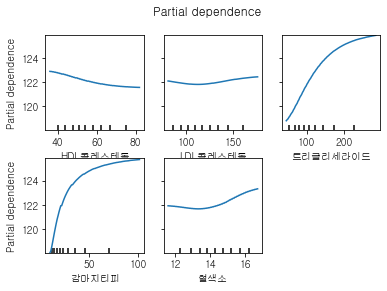

In [165]:
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
features = ['HDL콜레스테롤','LDL콜레스테롤','트리글리세라이드','감마지티피','혈색소']
plot_partial_dependence(est, train_X[:50000], features) 
fig = plt.gcf()
fig.suptitle('Partial dependence')
fig.subplots_adjust(hspace=0.3)

In [43]:
train_X

,HDL콜레스테롤,LDL콜레스테롤,트리글리세라이드,감마지티피,혈색소,연령대코드(5세단위)
419196,161.0,44.0,154.0,15.0,11.1,7
795693,68.0,98.0,202.0,856.0,15.4,10
495761,130.0,97.0,52.0,11.0,12.9,17
982486,121.0,99.0,96.0,28.0,12.9,12
137629,91.0,91.0,148.0,24.0,12.9,11
...,...,...,...,...,...,...
662143,95.0,86.0,128.0,21.0,13.5,10
597811,105.0,91.0,40.0,25.0,12.2,12
620525,113.0,79.0,60.0,17.0,12.5,11
98358,69.0,98.0,213.0,75.0,16.6,6


In [46]:
train_yb=train_set['special_bmi']

In [47]:
test_yb=test_set['special_bmi']

In [120]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor


est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(train_X, train_y)


Pipeline(steps=[('quantiletransformer', QuantileTransformer()),
                ('mlpregressor',
                 MLPRegressor(early_stopping=True, hidden_layer_sizes=(50, 50),
                              learning_rate_init=0.01))])

In [121]:
y_pred=est.predict(test_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,test_y)

510.2285160041491

In [122]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor


est = HistGradientBoostingRegressor()

est.fit(train_X, train_y)

HistGradientBoostingRegressor()

In [123]:
y_pred=est.predict(test_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,test_y)

511.09973812116766

In [124]:
from sklearn.ensemble import RandomForestRegressor
est=RandomForestRegressor()
est.fit(train_X, train_y)

RandomForestRegressor()

In [125]:
y_pred=est.predict(test_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,test_y)

565.2404587509471

In [50]:
!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.anaconda.org/scipy-wheels-nightly/simple


Computing partial dependence plots...
done in 5.659s


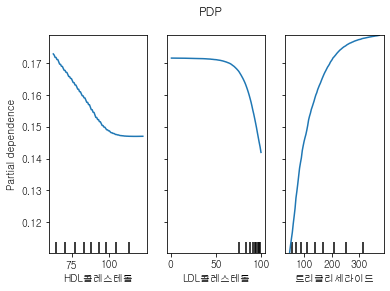

In [85]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

print('Computing partial dependence plots...')
tic = time()
features = ['HDL콜레스테롤','LDL콜레스테롤']
display = plot_partial_dependence(
       est, train_X, features, 
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    'PDP'
)
display.figure_.subplots_adjust(hspace=0.3)

Computing partial dependence plots...
done in 0.133s


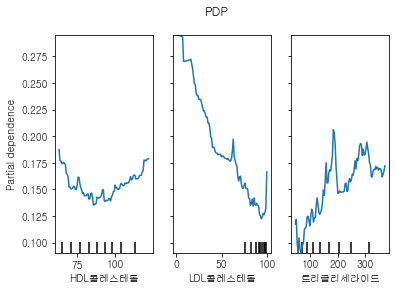

In [66]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

print('Computing partial dependence plots...')
tic = time()
features = ['HDL콜레스테롤','LDL콜레스테롤','트리글리세라이드']
display = plot_partial_dependence(
       est, train_X, features, 
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    'PDP'
)
display.figure_.subplots_adjust(hspace=0.3)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff208e2880>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff208e2df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff208d48b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff0ffe36d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff0ffe32e0>],
 'means': []}

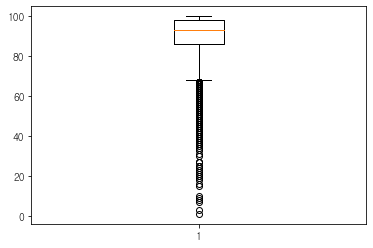

In [86]:
plt.boxplot(train_X['LDL콜레스테롤'])

In [87]:
train_X['LDL콜레스테롤']

419196    44.0
795693    98.0
495761    97.0
982486    99.0
137629    91.0
          ... 
662143    86.0
597811    91.0
620525    79.0
98358     98.0
845997    97.0
Name: LDL콜레스테롤, Length: 6854, dtype: float64

In [21]:
train_X

,HDL콜레스테롤,LDL콜레스테롤,트리글리세라이드,감마지티피,혈색소,연령대코드(5세단위)
42140,64.0,151.0,77.0,22.0,12.1,15
33289,39.0,147.0,189.0,95.0,16.2,10
48813,59.0,92.0,68.0,10.0,9.0,9
17661,46.0,136.0,146.0,20.0,14.8,11
14710,80.0,92.0,73.0,45.0,15.8,8
...,...,...,...,...,...,...
12142,62.0,142.0,107.0,13.0,14.3,9
48229,58.0,78.0,65.0,10.0,12.6,5
41134,46.0,133.0,95.0,10.0,13.7,16
921,47.0,169.0,178.0,58.0,15.6,11


{'whiskers': [<matplotlib.lines.Line2D at 0x1d61c5b3d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1d61c5c2430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d61c5b39d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d61c5c2af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d61c5c2df0>],
 'means': []}

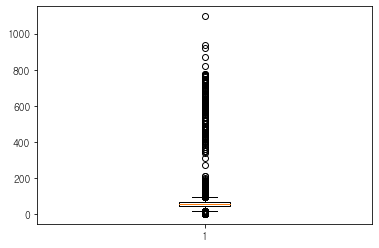

In [23]:
plt.boxplot(b_data['HDL콜레스테롤'])